In [1]:
import pandas as pd
import seaborn as sns
from utils import get_results
import matplotlib.pyplot as plt
from constants import *
import numpy as np

plt.rcParams['figure.dpi'] = 120

In [6]:
def headways(trips, rt, direction):
    tr = trips[(trips['stop_sequence']==1) & 
               (trips['route_id']==rt) & 
               (trips['direction']==direction)].copy()
    tr = tr.sort_values(by='departure_time_sec')
    tr['headway'] = tr['departure_time_sec'].diff()
    tr['schd_headway'] = tr['schd_time_sec'].diff()
    tr['schd_time'] = pd.to_timedelta(tr['schd_time_sec'], unit='S')
    tr['arr_time'] = pd.to_timedelta(tr['arrival_time_sec'].round(), unit='S')
    tr['dep_time'] = pd.to_timedelta(tr['departure_time_sec'].round(), unit='S')
    return tr[['stop_id', 'trip_id', 'run_id', 'route_id', 
               'block_id', 'headway', 'schd_headway',
               'arr_time', 'dep_time', 'schd_time']]

def barplots(r, title=None, ylabel=None):
    fig, ax = plt.subplots()
    r['wait_time'] = r['wait_time'].round("S")
    r['wait_time_mins']= r['wait_time'].dt.total_seconds()/60
    r['rt_dir'] = r['route_id'].astype(str) + '-' +r['direction']
    sns.barplot(r, y='wait_time_mins', x='rt_dir', 
                hue='scenario', palette=['black', 'gray', 'darkcyan'],
                ax=ax)
    if title:
        ax.set_title(title)
    if ylabel:
        ax.set_ylabel(ylabel)
    ax.set_xlabel('')
    # plt.ylim(0,20)

In [7]:
pax = pd.read_csv('data/sim_out/experiments_0625-2353/pax.csv', parse_dates=['arrival_time', 'boarding_time', 'alighting_time'])
trips = pd.read_csv('data/sim_out/experiments_0625-2353/trips.csv', parse_dates=['arrival_sec', 'departure_sec', 'schd_sec'])
worklog = pd.read_csv('data/sim_out/experiments_0625-2353/worklog.csv')
events = pd.read_csv('data/sim_out/experiments_0625-2353/events.csv')

In [ ]:
worklog[worklog['by_block'].notna()]

In [ ]:
worklog[worklog['dropped']==1]

In [8]:
def get_departures(trips, date_, rt, stop, scenario):
    tr = trips[trips['arrival_sec'].dt.date == pd.to_datetime(date_).date()].copy()
    tr = tr[tr['scenario']==scenario]
    tr = tr[(tr['route_id']==rt) & (tr['stop_sequence']==1) & (tr['stop_id']==stop)].sort_values(by='arrival_sec')
    return tr[['arrival_sec','departure_sec', 'schd_sec', 'trip_id']]

In [11]:
def get_wt_dep(trips, rt, scenario, date):
    hw = get_departures(trips, date, rt, OUTBOUND_TERMINALS[str(rt)][0], scenario)
    mean = hw['departure_sec'].diff().mean().total_seconds()
    sd = hw['departure_sec'].diff().std().total_seconds()
    wt = (mean/2) * (1+ np.power(sd/mean, 2))
    return wt/60

In [14]:
for scenario in ('EHD-DI', 'EHD', 'NC'):
    print(get_wt_dep(trips, 81, scenario, '2022-11-15'))

5.678481475499817
6.643411218921327
7.833286923413266


In [12]:
for scenario in ('EHD-DI', 'EHD', 'NC'):
    print(get_wt_dep(trips, 91, scenario, '2022-11-15'))

9.763682595503585
10.172664925542803
10.836618843213358


In [13]:
for scenario in ('EHD-DI', 'EHD', 'NC'):
    print(get_wt_dep(trips, 92, scenario, '2022-11-15'))

7.927825043305224
5.907199990682549
5.987703169602497


In [16]:
pax['date'] = pax['arrival_time'].dt.date

In [19]:
pax.groupby(['date', 'scenario', 'route_id', 'direction']).count()

boarding_stop  alighting_stop  \
date       scenario route_id direction                                  
2022-11-15 EHD      81       East                 638             638   
                             West                 537             537   
                    91       North                445             445   
                             South                389             389   
                    92       East                 661             661   
                             West                 430             430   
           EHD-DI   81       East                 609             609   
                             West                 529             529   
                    91       North                501             501   
                             South                429             429   
                    92       East                 720             720   
                             West                 388             388   
           NC       81       East                 562             562   
                             West                 494             494   
                    91       North                475             475   
                             South                392             392   
                    92       East                 697             697   
                             West                 398             398   
2022-11-23 EHD      81       East                 531             531   
                             West                 437             437   
                    91       North                421             421   
                             South                354             354   
                    92       East                 575             575   
                             West                 374             374   
           EHD-DI   81       East                 510             510   
                             West                 452             452   
                    91       North                442             442   
                             South                391             391   
                    92       East                 611             611   
                             West                 371             371   
           NC       81       East                 533             533   
                             West                 458             458   
                    91       North                448             448   
                             South                356             356   
                    92       East                 565             565   
                             West                 380             380   
2022-12-01 EHD      81       East                 560             560   
                             West                 499             499   
                    91       North                471             471   
                             South                402             402   
                    92       East                 666             666   
                             West                 427             427   
           EHD-DI   81       East                 599             599   
                             West                 481             481   
                    91       North                493             493   
                             South                409             409   
                    92       East                 655             655   
                             West                 365             365   
           NC       81       East                 584             584   
                             West                 527             527   
                    91       North                447             447   
                             South                387             387   
                    92       East                 637             637   
                         

In [30]:
events[(events['scenario']=='EHD-DI') & (events['date']=='2022-11-25') & (events['route_id']==81)]

,date,nr_step,time,route_id,direction,pax_load,stop_sequence,stop_id,scenario
464074,2022-11-25,3,18578.278041,81,East,2.0,1.0,14102.0,EHD-DI
464075,2022-11-25,4,18587.879385,81,East,2.0,1.0,14102.0,EHD-DI
464076,2022-11-25,5,18608.879385,81,East,2.0,2.0,3725.0,EHD-DI
464077,2022-11-25,6,18608.879385,81,East,2.0,2.0,3725.0,EHD-DI
464078,2022-11-25,7,18626.879385,81,East,2.0,3.0,3726.0,EHD-DI
...,...,...,...,...,...,...,...,...,...
695914,2022-11-25,12002,33876.802938,81,West,16.0,28.0,3801.0,EHD-DI
695915,2022-11-25,12002,33876.802938,81,West,5.0,28.0,3801.0,EHD-DI
695916,2022-11-25,12002,33876.802938,81,West,4.0,21.0,17246.0,EHD-DI
695917,2022-11-25,12002,33876.802938,81,East,2.0,48.0,2363.0,EHD-DI


In [14]:
am_pax = pax[pax['arrival_time'].dt.hour.isin([6,7,8])].copy()
am_pax['wait_time'] = am_pax['boarding_time'] - am_pax['arrival_time']
am_pax['date'] = am_pax['arrival_time'].dt.date

In [15]:
results = am_pax.groupby(
    ['scenario','route_id', 'direction'])['wait_time'].mean().reset_index()
results_95 = am_pax.groupby(
    ['scenario','route_id', 'direction'])['wait_time'].quantile(0.9).reset_index()

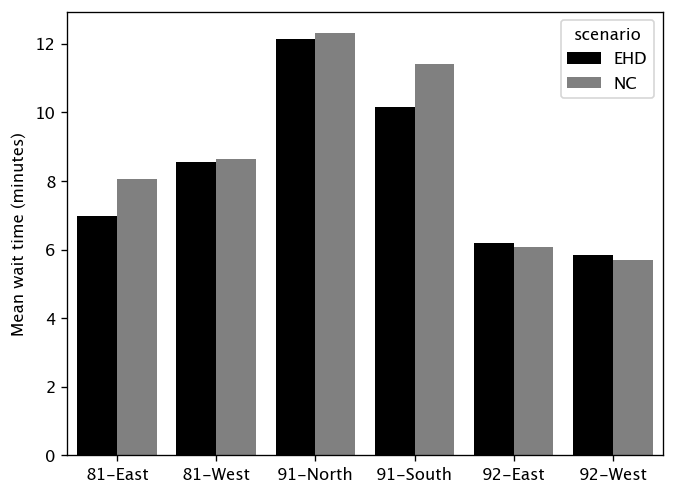

In [29]:
barplots(results, ylabel='Mean wait time (minutes)')

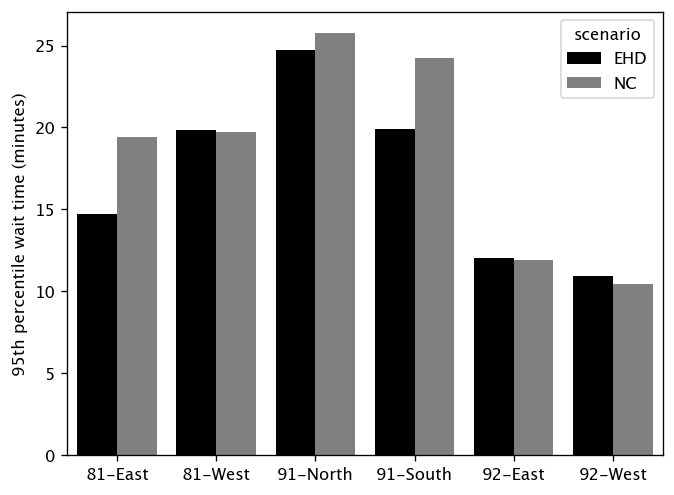

In [30]:
barplots(results_95, ylabel='95th percentile wait time (minutes)')

In [2]:
pax_in = pd.read_csv('data/sim_in/od.csv')

In [4]:
px = pax_in[pax_in['bin_30mins'].between(10, 18)].copy()

In [8]:
px.groupby(['route_id', 'direction'])['pax'].sum()

route_id  direction
81        East          601.736842
          West          507.263158
91        North         691.210159
          South         389.526316
92        East         1298.327203
          West          552.586230
Name: pax, dtype: float64

In [ ]:
px.groupby(['route_id', 'direction', 'bin_30mins'])['pax'].count().reset_index()

In [11]:
stops = pd.read_csv('data/sim_in/stops.csv')

In [13]:
stops.groupby(['route_id', 'direction', 'shape_id'])['stop_id'].count()

route_id  direction  shape_id
81        East       65216550    49
          West       65216551    51
91        North      65202946    66
                     65203781    28
          South      65202945    65
92        East       65202725    17
                     65207749    30
                     65207750    13
                     65216548    50
          West       65202721    27
                     65216549    51
Name: stop_id, dtype: int64

In [15]:
stops.groupby(['route_id', 'direction'])['stop_id'].nunique()


route_id  direction
81        East         49
          West         51
91        North        67
          South        65
92        East         54
          West         55
Name: stop_id, dtype: int64

In [20]:
54*54

2916

In [21]:
sched = pd.read_csv('data/sim_in/schedule.csv')

In [24]:
sched['h'] = (pd.to_timedelta(sched['arrival_time']).dt.total_seconds()/60/60).astype(int)

In [30]:
sched2 = sched[sched['h'].between(5, 23)].copy()

In [31]:
sched2 = sched2[sched2['stop_sequence']==1]

In [32]:
sched2.groupby(['route_id', 'direction', 'shape_id'])['trip_id'].count()

route_id  direction  shape_id
81        East       65216550    102
          West       65216551     97
91        North      65202946     65
                     65203781      1
          South      65202945     67
92        East       65202725      2
                     65207749      2
                     65207750      1
                     65216548     71
          West       65202721      2
                     65216549     69
Name: trip_id, dtype: int64

In [ ]:
tri1 = pd.read_csv('data/sim_out/experiments_0413-1258/trips.csv')
# tri2 = pd.read_csv('data/sim_out/experiments_0413-1258/EHD/trips.csv')

In [ ]:
hws = headways(tri2, 91, 'South')
hws['arr_time'] += pd.to_datetime('2022-11-15')
hws

In [ ]:
start_time = 7*60*60
end_time = 9*60*60
res = get_results('0529-1244', ['EHD', 'NC'], start_time, end_time)
res

In [ ]:
def wait_t(df, st, et):
    wdf = df[(df['arrival_time'] > st) & (df['arrival_time'] < et)].copy()
    wdf['wait'] = wdf['boarding_time'] - wdf['arrival_time']
    return wdf[['boarding_stop', 'alighting_stop', 'route_id', 'wait', 'direction']]

In [ ]:
pax1 = pd.read_csv('data/sim_out/experiments_0607-0053/NC/pax.csv')
pax2 = pd.read_csv('data/sim_out/experiments_0607-0053/EHD/pax.csv')

arr0 = 20300
arr1 = 30000

w1 = wait_t(pax1, arr0, arr1)
w2 = wait_t(pax2, arr0, arr1)

w1 = w1.groupby(['route_id', 'direction'])['wait'].mean().reset_index()
w2 = w2.groupby(['route_id','direction'])['wait'].mean().reset_index()

for w, k in zip([w1, w2], ['DN', 'EHD']):
    w['rt_dir'] = w['route_id'].astype(str) + '-' + w['direction']
    w['scenario'] = k

results = pd.concat([w1, w2], ignore_index=True)

sns.barplot(data=results, hue='scenario', y='wait', x='rt_dir')